In [3]:
%%writefile /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample.py
##Make frequency and read file, oriented by ancestry (allele in chimp)

import collections
import numpy as np
import sys
import random
#moderneas="Japanese"
moderneas=sys.argv[1]

pD1="/mnt/solexa/mel_yang/bronzeage/data/"
pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
fh="ind_A_v13_TBH"
#indfilename="ind_A_v13_TBH_manualpdeasmerge"
indfilename="ind_A_v13_TBH_mergeHanALL"
indfile=open(pD1+indfilename+".ind",'r')
pdeasall=[]
for ind,line in enumerate(indfile):
    x = line.split()
    if x[2] == moderneas: pdeasall.append(ind)
    if x[2] == "Chimp": ancind=ind ##ONLY 0/2, no heterozygotes
indfile.close()

print len(pdeasall)
for howmany in [10,25,40,50,75,100,111]: #[5,10,15,20,25,30]:
    pdeas=sorted(random.sample(pdeasall,howmany))

    newfile=open(pD2+indfilename+".pdEAS_dfb1."+moderneas+".ss"+str(howmany)+".dfreq",'w')
    #newfile.write(moderneas+".ss"+str(howmany)+'\n')
    newfile.write('kref\tnref\n')
    genofile=open(pD1+fh+".geno",'r')
    num=0
    for line in genofile:
        num+=1
        #if num==10: break
        ancgeno=int(line[ancind])

        easgeno=[int(line[ind]) for ind in pdeas]
        if 9 in easgeno: mydfreq=-5
        else: 
            total=2.0*len(easgeno)
            secondallele=np.sum(easgeno)
            if ancgeno==0: mydfreq= secondallele #secondallele/total
            elif ancgeno==2: mydfreq=total-secondallele #1-(secondallele/total)
            else: print "ancgeno is", ancgeno
        dfreqs=mydfreq
        #if indiv=="Han_HGDP": print easgeno, ancgeno, mydfreq,mydfreq*66
        newfile.write("%i\t%i" % (dfreqs,total) + '\n')
        #newfile.write("%.4f" % dfreqs + '\n')

    newfile.close()

  
    

Overwriting /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample.py


In [27]:
%%writefile /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample_noAFR.py
##Make frequency and read file, oriented by ancestry (allele in chimp)
##Treat sites fixed in Africans (Yoruba, Mandenka, Mbuti, Ju_hoan_North) as missing data - filter out!

import collections
import numpy as np
import sys
import random
#moderneas="Japanese"
moderneas=sys.argv[1]

pD1="/mnt/solexa/mel_yang/bronzeage/data/"
pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
fh="ind_A_v13_TBH"
subset="fixedAfr_dfb1"
#indfilename="ind_A_v13_TBH_manualpdeasmerge"
indfilename="ind_A_v13_TBH_mergeHanALL"
indfile=open(pD1+indfilename+".ind",'r')
africans=["Yoruba", "Mandenka", "Mbuti", "Ju_hoan_North"]
pdeasall,africanall=[],[]
for ind,line in enumerate(indfile):
    x = line.split()
    if x[2] == moderneas: pdeasall.append(ind)
    if x[2] in africans: africanall.append(ind)
    if x[2] == "Chimp": ancind=ind ##ONLY 0/2, no heterozygotes
indfile.close()
print len(africanall)
print len(pdeasall)
for howmany in [10,25,40,50,75,100,111]: #[5,10,15,20,25,30]:
    pdeas=sorted(random.sample(pdeasall,howmany))

    newfile=open(pD2+indfilename+".pdEAS_"+subset+"."+moderneas+".ss"+str(howmany)+".dfreq",'w')
    #newfile.write(moderneas+".ss"+str(howmany)+'\n')
    newfile.write('kref\tnref\n')
    genofile=open(pD1+fh+".geno",'r')
    num=0
    for line in genofile:
        num+=1
        #if num==10: break
        ancgeno=int(line[ancind])
        easgeno=[int(line[ind]) for ind in pdeas]
        afrgeno=''.join([str(i) for i in list(set([int(line[ind]) for ind in africanall]))])
        if afrgeno in ['09','90','29','92']: mydfreq=-5
        else: 
            if 9 in easgeno: mydfreq=-5
            else: 
                total=2.0*len(easgeno)
                secondallele=np.sum(easgeno)
                if ancgeno==0: mydfreq= secondallele #secondallele/total
                elif ancgeno==2: mydfreq=total-secondallele #1-(secondallele/total)
                else: print "ancgeno is", ancgeno
        dfreqs=mydfreq
        #if indiv=="Han_HGDP": print easgeno, ancgeno, mydfreq,mydfreq*66
        newfile.write("%i\t%i" % (dfreqs,total) + '\n')
        #newfile.write("%.4f" % dfreqs + '\n')

    newfile.close()

  
    

Overwriting /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample_noAFR.py


33


In [28]:
%%bash
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
fh="ind_A_v13_TBH_mergeHanALL"
subset="_dfb1"
subset="_fixedAfr_dfb1"
addon="_switchanc"
ref="HanALL"
for ss in 10 25 40 50 75 100 111; 
do
    paste ${pD}jda_anceas${addon}.chrompos ${pD2}${fh}.pdEAS${subset}.${ref}.ss${ss}.dfreq ${pD}jda_anceas${addon}.readcount > ${pD2}jda${subset}_anceas${addon}_${ref}.ss${ss}.comb
    #_nomissfixed.comb
done

In [12]:
pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
orderednames=['L0554','R2039','R2142','L0597','R2096','R2148',
              'R2038','R2099','TY','M11','M12','M819','M820',
              'M827','M9JM6-1','L0729','D1965','D1968','D5602',
              'D5604','D5605','D5607','D5608']
mypops=["Tonglin","Linzi","XianShang","Yaojia","Zhougongmiao",
       "XianShang","Linzi","Linzi","Tianyuan","Donghuigou",
       "Donghuigou","Donghuigou","Donghuigou","Donghuigou",
        "Donghuigou","Balikun","Xiaoshuangqiao","Xiaoshuangqiao",
        "Xiaoshuangqiao","Guandimiao","Guandimiao",
       "Guandimiao_contaminated","Guandimiao"]
newindfile=open(pD2+"ancindivs.ind",'w')
for ind,i in enumerate(orderednames):
    newindfile.write("%s\tU\t%s\n" % (i,mypops[ind]) )
newindfile.close()

In [29]:
##Remove missing or fixed data
##Remove 

pD2="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
subset1="dfb1_"
subset1="fixedAfr_dfb1_"
subset2=subset1#+"df5co_"
#subset2=subset1 #+"manualmerge_"
ref="HanALL"
ss=30
for ss in [10,25,40,50,75,100,111]:
#for ref in ["Japanese","French","Han_NChina","Han_SChina","Kazakh",
#            "TibetanSW","She_Miao_Tujia","Thai_Dai","Spanish","Yoruba"]:
    combfile=open(pD2+"jda_"+subset1+"anceas"+addon+"_"+ref+".ss"+str(ss)+".comb",'r')
    newcombfile=open(pD2+"jda_"+subset2+"anceas"+addon+"_"+ref+".ss"+str(ss)+"_nomissfixed.comb",'w')
    for line in combfile:
        x=line.split()
        if x[0] == "Chrom": newcombfile.write(line); continue
        if x[2] == '0' or x[2] == x[3] or x[2] == "-5": continue
        #myfreq=float(x[2])/float(x[3])
        #if myfreq<0.05 or myfreq>0.95: continue
        #if myfreq<0.025 or myfreq>0.975: continue
        newcombfile.write(line)
    combfile.close()
    newcombfile.close()

In [31]:
%%writefile /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_HanALLss_dfb1_testbeta0.py
from ancient_genotypes import *
from numpy import *
import pandas
import cPickle
pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
refpop="HanALL"
myss=[10,25,40,50,75,100,111]
#subset1="dfb1_df5co"
subset1="dfb1"
subset1="fixedAfr_dfb1"
#subset1="dfb1_manualmerge_beta1"
subset2=subset1+"_beta0"
#subset2=subset1
indfile=pD+"ancindivs.ind"
#newfile=open(pD+refpop+"."+subset2+"alphabetadiffrefpops.txt",'w')
#for ss in myss:
#    myref=refpop+".ss"+str(ss)
#    readfile=pD+"jda_"+subset1+"_anceas"+addon+"_"+myref+"_nomissfixed.comb"
#    unique_pops, inds, label, pops, freqs, read_lists = parse_reads_by_pop(readfile,indfile,cutoff=0)
#    alpha, beta = get_beta_params(freqs,read_lists)
#    newfile.write("%s\t%.4f\t%.4f\n" % (refpop,alpha,beta))
#newfile.close()
alpha,beta=(0.5,0.5)
for ss in myss:
    myref=refpop+".ss"+str(ss)
    readfile=pD+"jda_"+subset1+"_anceas"+addon+"_"+myref+"_nomissfixed.comb"
    
    unique_pops, inds, label, pops, freqs, read_lists = parse_reads_by_pop(readfile,indfile,cutoff=0)

    params_pops = optimize_pop_params_error_parallel(freqs,read_lists,num_core=10,detail=0,alpha=alpha,beta=beta,continuity=False)
    cPickle.dump(params_pops,open(pD+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contFalse.pickle","w"))
    params_pops = optimize_pop_params_error_parallel(freqs,read_lists,num_core=10,detail=0,alpha=alpha,beta=beta,continuity=True)
    cPickle.dump(params_pops,open(pD+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contTrue.pickle","w"))


Overwriting /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_HanALLss_dfb1_testbeta0.py


In [5]:
%%writefile /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_ancpopns.py
from ancient_genotypes import *
from numpy import *
import pandas
import cPickle
pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
refpop="HanALL"
myss=[10,25,40,50,75,100,111]
myss=[10]
subset1="dfb1"
subset1="fixedAfr_dfb1"

subset2=subset1+"_beta0"

indfile=pD+"ancindivs.ind"

alpha,beta=(0.5,0.5)
for ss in myss:
    myref=refpop+".ss"+str(ss)
    readfile=pD+"jda_"+subset1+"_anceas"+addon+"_"+myref+"_nomissfixed.comb"
    
    unique_pops, inds, label, pops, freqs, read_lists = parse_reads_by_pop(readfile,indfile,cutoff=0)
    print inds
    print pops
    print label

Overwriting /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_ancpopns.py


In [6]:
%%bash

pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"

cat ${pD}"ancindivs.ind"

L0554	U	Tonglin
R2039	U	Linzi
R2142	U	XianShang
L0597	U	Yaojia
R2096	U	Zhougongmiao
R2148	U	XianShang
R2038	U	Linzi
R2099	U	Linzi
TY	U	Tianyuan
M11	U	Donghuigou
M12	U	Donghuigou
M819	U	Donghuigou
M820	U	Donghuigou
M827	U	Donghuigou
M9JM6-1	U	Donghuigou
L0729	U	Balikun
D1965	U	Xiaoshuangqiao
D1968	U	Xiaoshuangqiao
D5602	U	Xiaoshuangqiao
D5604	U	Guandimiao
D5605	U	Guandimiao
D5607	U	Guandimiao_contaminated
D5608	U	Guandimiao


In [33]:
%%writefile /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_HanALLss.py
from ancient_genotypes import *
from numpy import *
import pandas
import cPickle
pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
refpop="HanALL"
myss=[10,25,40,50,75,100,111]

subset1="dfb1"
subset1="fixedAfr_dfb1"
subset2=subset1+"nobeta"

for ss in myss:
    myref=refpop+".ss"+str(ss)
    readfile=pD+"jda_"+subset1+"_anceas"+addon+"_"+myref+"_nomissfixed.comb"
    freq, reads, inds = parse_reads(readfile,cutoff=0)
    ##Tonglin, Linzi, XianShang, Yaojia/ZGM, TY, DHG, BLK, XSQ, ZGM, ZGM_cont
    pops=[[0],[1,6,7],[2,5],[3],[4],[8],[9,10,11,12,13,14],[15],[16,17,18],[19,20,22],[21]]
    params_pops = optimize_pop_params_error_parallel(freq,reads,pops,detail=False,num_core=8,continuity=False)
    cPickle.dump(params_pops,open(pD+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contFalse.pickle","w"))
    params_pops = optimize_pop_params_error_parallel(freq,reads,pops,detail=False,num_core=8,continuity=True)
    cPickle.dump(params_pops,open(pD+subset2+"_ind_A_v13_TBH"+addon+"."+myref+"_contTrue.pickle","w"))

Writing /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_HanALLss.py


['Tonglin', 'Linzi', 'XianShang', 'Yaojia', 'Zhougongmiao', 'Tianyuan', 'Donghuigou', 'Balikun', 'Xiaoshuangqiao', 'Guandimiao', 'Guandimiao_contaminated']
['Balikun', 'Donghuigou', 'Guandimiao', 'Guandimiao_contaminated', 'Linzi', 'Tianyuan', 'Tonglin', 'XianShang', 'Xiaoshuangqiao', 'Yaojia', 'Zhougongmiao']
XianShang
-------HanALL.ss10-------
False XianShang 76679.4309627 [0.024323223495952527, 0.067866665411844745, 0.033017950620698171, 0.028243489229165777]
True XianShang 76705.3588471 [0.029802955261483143, 0.02991062594219206, 0.025503484255599378]
25.9278843973
XianShang
-------HanALL.ss25-------
False XianShang 76618.9888126 [0.010822769328247448, 0.029971332032857966, 0.021132785135763773, 0.016735549563565488]
True XianShang 76625.4954012 [0.013159855657024273, 0.019950140583578007, 0.015815538330153468]
6.50658861645
XianShang
-------HanALL.ss40-------
False XianShang 75194.2741093 [0.0049737342084186665, 0.028983113627577349, 0.020527358967345932, 0.016249550659978348]
Tru

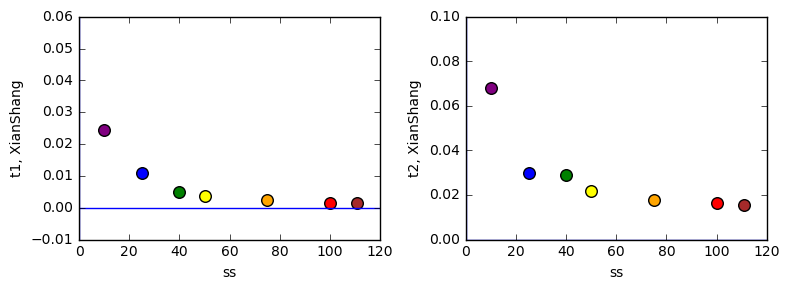

In [4]:
%matplotlib inline

import cPickle
import matplotlib.pyplot as plt
pD="/mnt/solexa/mel_yang/bronzeage/jda_dfb/"
addon="_switchanc"
#subset="dfb1_df5co_beta1_"
subset="dfb1_beta1_"
#subset="fixedAfr_nobeta_"
#subset="fixedAfr_dfb1_beta1_"
subset="nobeta_" #df5co_"
#subset=""
myss=[10,25,40,50,75,100,111] #[5,10,15,20,25,30] #
refpops=["HanALL.ss%i" % i for i in myss]
#refpops=["Han_HGDP"]

mypops=[]
indfile=open(pD+"ancindivs.ind",'r')
for line in indfile: 
    x=line.split()
    if x[2] in mypops: continue
    else: mypops.append(x[2])
print mypops
mypops=sorted(mypops)
print mypops
ancpop="XianShang"
#fig = plt.figure()
for myind,popiwant in enumerate(mypops):
    if popiwant!=ancpop: continue
    fig = plt.figure(figsize=(8,3))
    #if myind!=4: continue
    #ax = fig.add_subplot(4,2,myind+1)
    
    t1f,t2f,t1t,t2t=[],[],[],[]
    for refpop in refpops:
        #print "_______________________"
        #print refpop
        falsefile=open(pD+subset+"ind_A_v13_TBH"+addon+"."+refpop+"_contFalse.pickle",'r')
        falsedat=cPickle.load(falsefile)
        truefile=open(pD+subset+"ind_A_v13_TBH"+addon+"."+refpop+"_contTrue.pickle",'r')
        truedat=cPickle.load(truefile)
        #print falsedat[0][0]

        for ind,mypop in enumerate(falsedat):
            #print mypop
            #if ind in [0,2,3,4]: continue
            #if ind in [0,1,2,3]: continue
            if mypops[ind] == popiwant:
                print mypops[ind]
                if mypops[ind]==ancpop:
                    print "-------"+refpop+"-------"
                    print "False", mypops[ind],mypop[1], list(mypop[0])
                    print "True", mypops[ind],truedat[ind][1],list(truedat[ind][0])
                    print truedat[ind][1]-mypop[1]
                t1f.append(mypop[0][0])
                t2f.append(mypop[0][1])
                t1t.append(truedat[ind][0][0])
                t2t.append(truedat[ind][0][1])


    colors=["purple","blue","green","yellow","orange","red","brown",
            "gray","black","lavender","fuchsia","goldenrod","peachpuff","cyan",
            "lawngreen","mediumslateblue","cadetblue","pink","tan","lavenderblush",
            "sage","peru","gainsboro"]
    #print t1f
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    for i in range(len(t1f)):
        #handles.append(ax.scatter(t1f[i],t2f[i],c=colors[i],label=refpops[i]))
        #ax.scatter(t1f[i],t2f[i],label=refpops[i],c=colors[i],s=70)
        ax1.scatter(myss[i],t1f[i],label=refpops[i],c=colors[i],s=70) #/t2f[i]
        ax2.scatter(myss[i],t2f[i],label=refpops[i],c=colors[i],s=70) #/t2f[i]
    #print t1f
    #ax.set_xlim((0,0.13))
    #ax.set_ylim((0,0.35))
    ax1.set_xlabel("ss")
    ax1.set_ylabel("t1, "+popiwant)
    ax1.axhline(y=0)
    ax1.axvline(x=0)
    ax2.set_xlabel("ss")
    ax2.set_ylabel("t2, "+popiwant)
    ax2.axhline(y=0)
    ax2.axvline(x=0)
    fig.tight_layout()
#ax.legend(fontsize=10,bbox_to_anchor=(1.1, -0.1),ncol=4, fancybox=True, shadow=True)


In [37]:
falsefile=open(pD+"dfb_ind_A_v13_TBH"+addon+"."+refpop+"_contFalse.pickle",'r')
falsedat=cPickle.load(falsefile)
print len(falsedat)



11


In [ ]:
False Zhougongmiao 523646.34879 [0.0096042502591904104, 0.00049267449430023108, 0.0089989540789301662, 0.016607875066723239, 0.0085094593332150619]
True Zhougongmiao 523646.404288 [0.0097633460839480803, 0.0089872715439000966, 0.016563269467803225, 0.0085014817635390341]

False Zhougongmiao 552963.16715 [0.0096960997523576169, 0.0003998186715441196, 0.0090712054736462339, 0.016332835545118024, 0.0085620301406886066]
True Zhougongmiao 552963.206228 [0.0098184386134607705, 0.0090611425470862126, 0.016299802014087473, 0.0085552978241993215]